In [1]:
import googlemaps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [2]:
df_blr= pd.read_excel('Cowork_Space_transform.xlsx', sheet_name='Bangalore_transformed')
df_hyd= pd.read_excel('Cowork_Space_transform.xlsx', sheet_name='Hyderabad_transformed')

# Data Analysis 

###  Number of Coworking Solutions in Bangalore

In [3]:
len(df_blr)

97

###  Number of Coworking Solutions in Hyderabad

In [4]:
len(df_hyd)

57

In [51]:
def Plot_Distribution(df,Top_Localities):
    Area_dict={}
    prev_row=''
    combined_strings = df.apply(lambda row: f"{row['Name']},{row['Location']}", axis=1)
    for x in Top_Localities:
            Area_dict[x]=0
            
    for i in combined_strings:
        if i==prev_row:
            continue
        for j in Top_Localities:
            if j in i:
                if j=="hitec city":
                    Area_dict["HiTECH City"]=Area_dict['HiTECH City']+1
                    break
                if j=="Mahatma Gandhi Road":
                    Area_dict["MG Road"]=Area_dict['MG Road']+1
                    break
                if j=="Hosur":
                    Area_dict["Hosur Road"]=Area_dict['Hosur Road']+1
                    break
                if j=="80 Feet Main Road":
                    Area_dict["Koramangala"]=Area_dict['Koramangala']+1
                    break
                Area_dict[j]=Area_dict[j]+1
                
                break
        prev_row=i 
   
        
    try:
        del Area_dict['hitec city']
    except:
        pass
    try:
        del Area_dict['Mahatma Gandhi Road']
    except:
        pass
    try:
        del Area_dict['Hosur']
    except:
        pass
    try:
        del Area_dict['80 Feet Main Road']
    except:
        pass
    return Area_dict


def plot_price_distribution(df,Top_Localities,Area_dict):
    Area_Price_dict={}
    
    prev_row=''
    filtered_df = df[df['Solutions'].isin(['Private office','Private Cabin:','Fixed Desks','Office Space','Fixed Desk'])]
    filtered_df.reset_index(drop=True, inplace=True)
    combined_strings = filtered_df.apply(lambda row: f"{row['Name']},{row['Location']}", axis=1)
    
    for x in Top_Localities:
        Area_Price_dict[x]=0
    for i,k in zip(combined_strings,range(len(combined_strings))):
        if i==prev_row:
            continue
        for j in Top_Localities:
            if j in i:
                if j=="hitec city":
                    price=filtered_df.loc[k,'Price']
                    
                    Area_Price_dict["HiTECH City"]=int(Area_Price_dict["HiTECH City"])+int(price)
                    break
                if j=="Mahatma Gandhi Road":
                    price=filtered_df.loc[k,'Price']
                    
                    Area_Price_dict["MG Road"]=int(Area_Price_dict["MG Road"])+int(price)
                    break
                if j=="Hosur":
                    price=filtered_df.loc[k,'Price']
                    
                    Area_Price_dict["Hosur Road"]=int(Area_Price_dict["Hosur Road"])+int(price)
                    break
                if j=="80 Feet Main Road":
                    price=filtered_df.loc[k,'Price']
                    
                    Area_Price_dict["Koramangala"]=int(Area_Price_dict["Koramangala"])+int(price)
                    break
                    
                price=filtered_df.loc[k,'Price']
                Area_Price_dict[j]=int(Area_Price_dict[j])+int(price)
                
                break
        prev_row=i 
    
    try:
        del Area_Price_dict['hitec city']
    except:
        pass
    try:
        del Area_Price_dict['Mahatma Gandhi Road']
    except:
        pass
    try:
        del Area_Price_dict['Hosur']
    except:
        pass
    try:
        del Area_Price_dict['80 Feet Main Road']
    except:
        pass

    
    for z in Top_Localities:
        if (z=="hitec city") or (z=="Mahatma Gandhi Road") or (z=="Hosur") or (z=='80 Feet Main Road') :
            continue
        
        Area_Price_dict[z]=Area_Price_dict[z]/Area_dict[z]
        

    labels = list(Area_dict.keys())
    values = list(Area_dict.values())
    fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15, 8))
    ax1.bar(labels, values, color='skyblue')
    ax1.set_title('Number of Spaces In Top Localities')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45, ha='right')
    ax1.set_xlabel('Locality')
    ax1.set_ylabel('Spaces')
  
    
    labels2 = list(Area_Price_dict.keys())
    values2 = list(Area_Price_dict.values())
    
    ax2.bar(labels2, values2, color='skyblue')
    ax2.set_title('Avg Price per Locality')
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45, ha='right')
    ax2.set_xlabel('Locality')
    ax2.set_ylabel('Avg Price')
    plt.show();





### Distribution of Spaces in Top Localities and with their respective Prices in Bangalore 

/var/folders/5m/bbkz7jt14ks2tf3nb9klny4c0000gn/T/ipykernel_16603/3725849534.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45, ha='right')
/var/folders/5m/bbkz7jt14ks2tf3nb9klny4c0000gn/T/ipykernel_16603/3725849534.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45, ha='right')


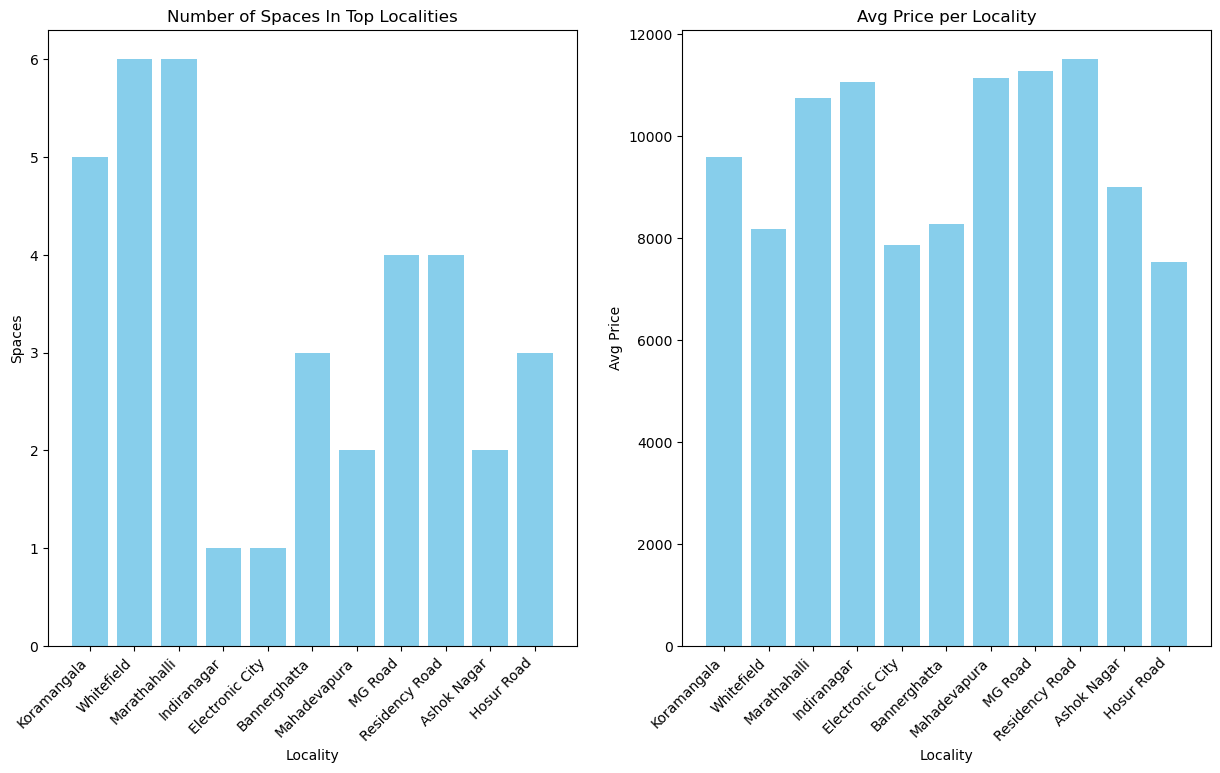

In [52]:
Top_Localities_Bangalore=['Koramangala','Whitefield','Marathahalli','Indiranagar','Electronic City','Bannerghatta','Mahadevapura','MG Road','Residency Road','Ashok Nagar', 'Mahatma Gandhi Road','Hosur','Hosur Road','80 Feet Main Road']
dict=Plot_Distribution(df_blr,Top_Localities_Bangalore)

plot_price_distribution(df_blr,Top_Localities_Bangalore,dict)


### Distribution of Spaces in Top Localities and with their respective Prices in Hyderabad

/var/folders/5m/bbkz7jt14ks2tf3nb9klny4c0000gn/T/ipykernel_16603/3725849534.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45, ha='right')
/var/folders/5m/bbkz7jt14ks2tf3nb9klny4c0000gn/T/ipykernel_16603/3725849534.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45, ha='right')


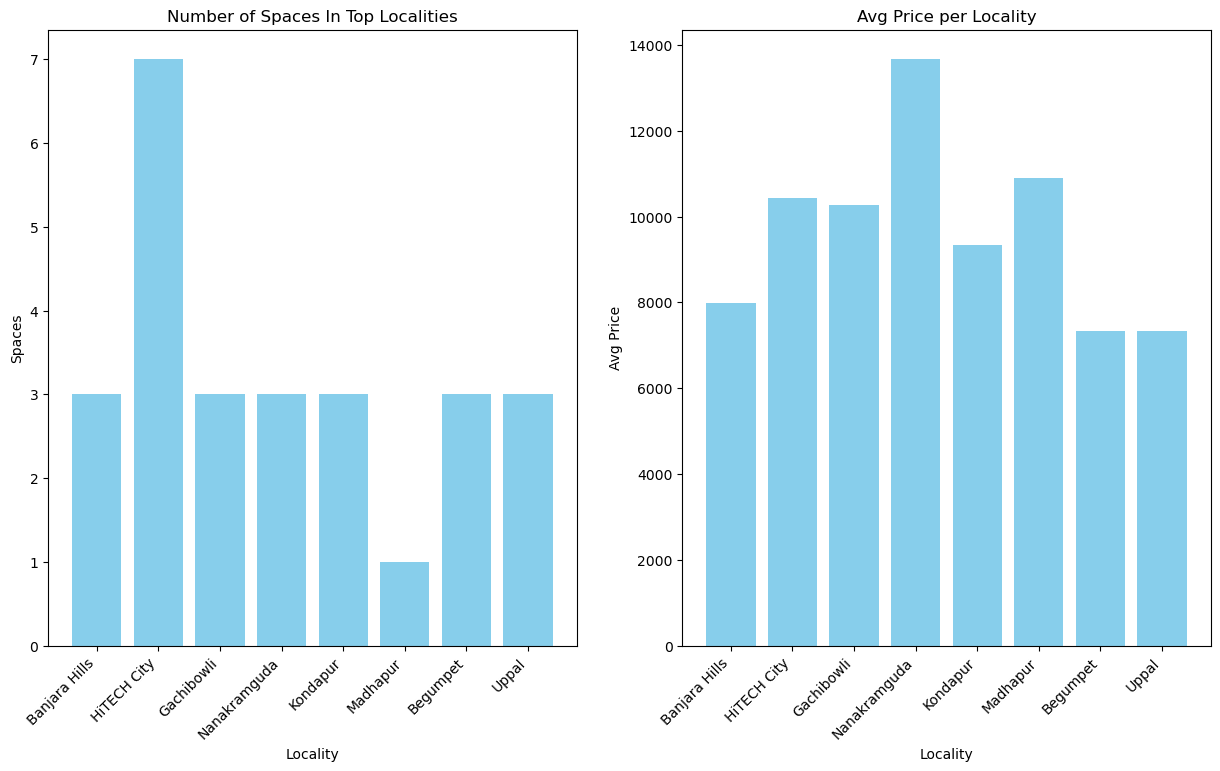

In [53]:
Top_Localities_Hyderabad=['Banjara Hills','HiTECH City','hitec city','Gachibowli','Nanakramguda','Kondapur','Madhapur','Begumpet','Uppal']
dict=Plot_Distribution(df_hyd,Top_Localities_Hyderabad)

plot_price_distribution(df_hyd,Top_Localities_Hyderabad,dict)


### Statistical data on coworking space prices in Bangalore

In [11]:
df_blr.Price.astype(int).describe()

count       97.000000
mean     18173.340206
std      12412.653265
min       5090.000000
25%      10000.000000
50%      13199.000000
75%      24000.000000
max      98000.000000
Name: Price, dtype: float64

### Statistical data on coworking space prices in Hyderabad

In [14]:
df_hyd.Price.astype(int).describe()

count       57.000000
mean     15228.035088
std       8524.000781
min       6999.000000
25%      11000.000000
50%      11000.000000
75%      19000.000000
max      52000.000000
Name: Price, dtype: float64

In [54]:
def get_avg_price(df):
    filtered_df = df[df['Solutions'].isin(['Private office','Private Cabin:','Fixed Desks','Office Space','Fixed Desk'])]
    average_price = filtered_df['Price'].mean()
    return average_price
    

### Average Price per Seat in Bangalore

In [55]:
get_avg_price(df_blr)

15347.953846153847

### Average Price per Seat in Hyderabad

In [56]:
get_avg_price(df_hyd)

11477.75

In [57]:
def Plot_distance(df):
    filtered_df = df[~df['Distance From Metro'].isin(['NA'])]
    new_filtered_df=filtered_df[(filtered_df['Distance From Metro']<2000)]
    sorted_df = new_filtered_df.sort_values(by='Distance From Metro',ascending=True)
    sorted_df.reset_index(drop=True, inplace=True)
    labels=['Spaces with distance from the metro within 2km','Spaces with distance from the metro more than 2km']
    sizes=[len(sorted_df),(len(df)-len(sorted_df))]
    explode=[0,0.1]
    fig, ax = plt.subplots()
    ax.pie(sizes,explode=explode, labels=labels,autopct='%1.1f%%');
    return sorted_df

### Pie chart illustrating the distribution of Bangalore coworking spaces based on their distance from metro stations

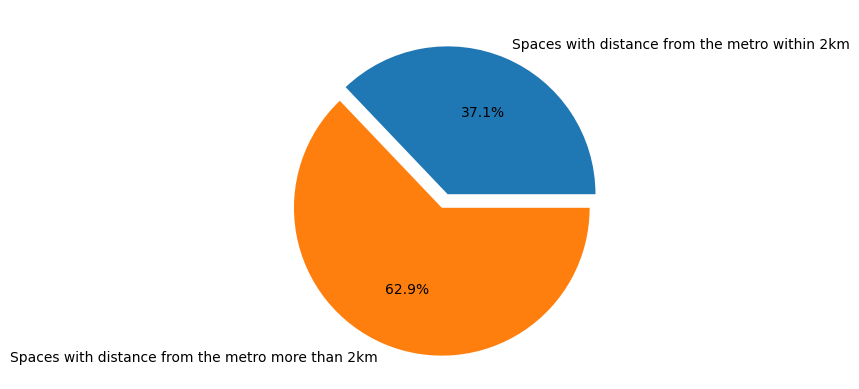

In [58]:
sorted_df=Plot_distance(df_blr)
#sorted_df

### Pie chart illustrating the distribution of Hyderabad coworking spaces based on their distance from metro stations

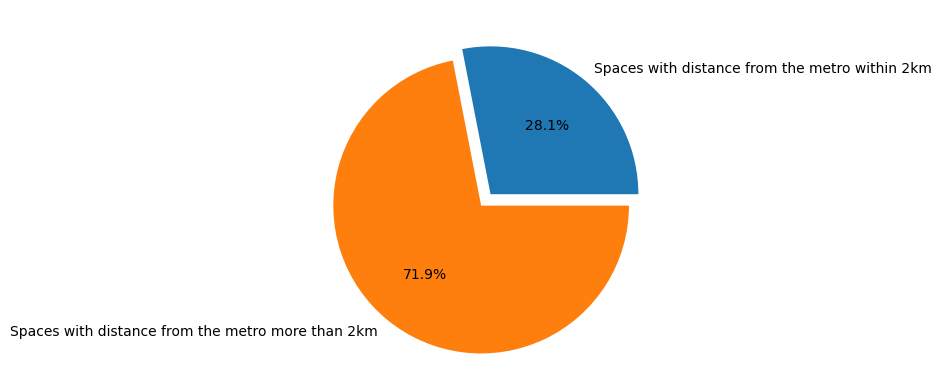

In [59]:
sorted_df=Plot_distance(df_hyd)
#sorted_df

In [60]:
def Plot_Ratings(df):
    filtered_df = df[~df['Ratings'].isin(['NA'])]
    new_filtered_df=filtered_df[(filtered_df['Ratings']>=4)]
    sorted_df = new_filtered_df.sort_values(by='Ratings',ascending=False)
    sorted_df.reset_index(drop=True, inplace=True)
    len(sorted_df)
    labels=['Spaces with Ratings 4 and above','Spaces with ratings below 4']
    sizes=[len(sorted_df),(len(df)-len(sorted_df))]
    explode=[0,0.1]
    fig, ax = plt.subplots()
    ax.pie(sizes,explode=explode, labels=labels,autopct='%1.1f%%');
    return sorted_df

### Pie chart illustrating the distribution of Bangalore coworking spaces based on their Ratings

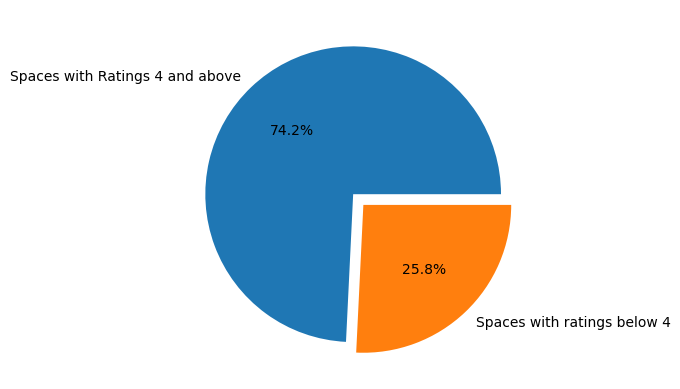

In [61]:
sorted_df=Plot_Ratings(df_blr)
# sorted_df

### Pie chart illustrating the distribution of Hyderabad coworking spaces based on their Ratings

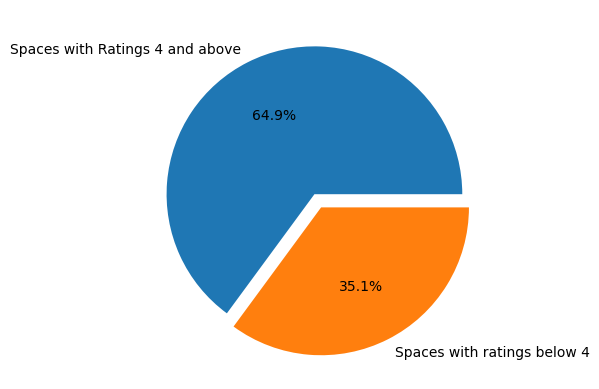

In [62]:
sorted_df=Plot_Ratings(df_hyd)
#sorted_df

### Spaces in Bangalore that are in a techpark

In [63]:
filtered_df = df_blr[df_blr['InTechPark'].isin(['Yes'])]
print(len(filtered_df))
filtered_df

28


,Website,Name,Location,Solutions,Price,Area Name,Distance From Metro,Nearest Metro Station,Ratings,InTechPark
2,91SpringBoard,"ITPL Main Road, Mahadevapura",Just 450m away from Garudacharapalya Metro Sta...,Private Cabin:,12050,ITPL Main Rd,1558.0,Garudacharpalya,4.3,Yes
3,91SpringBoard,"ITPL Main Road, Mahadevapura",Just 450m away from Garudacharapalya Metro Sta...,Open Dedicated:,10200,ITPL Main Rd,1558.0,Garudacharpalya,4.3,Yes
12,Wework,WeWork Prestige Tech Park,"Jupiter block, Prestige Tech Park",Private office,19500,Bellandur Amanikere,7438.0,Seetharam Palya,4.9,Yes
13,Wework,WeWork Roshni Tech Hub,"BBMP Khatha No. 1395, Sy.No. 26 (P), Marathaha...",Private office,18500,NaN,5232.0,Seetharam Palya,4.3,Yes
15,Wework,WeWork Vaishnavi Signature,"No. 78/9, Outer Ring Road, Bellandur Village",Private office,21000,Bellandur,10418.0,Trinity,4.5,Yes
19,Wework,WeWork Manyata Redwood,"Embassy Manyata Business Park, Block D3",Private office,25000,Thanisandra,10301.0,Swami Vivekananda Road,4.7,Yes
20,Wework,WeWork Manyata,Embassy Manyata Business Park,Private office,23500,Nagavara,10301.0,Swami Vivekananda Road,4.4,Yes
21,Wework,WeWork Embassy TechVillage,"Block L, Embassy TechVillage",Private office,22000,Bellandur,NaN,NaN,4.4,Yes
22,Wework,WeWork RMZ Latitude,"9th floor, RMZ Latitude Commercial",Private office,19000,Vinayakanagar,8458.0,Goraguntepalya,4.3,Yes
23,Wework,WeWork Sunriver,"Sunriver, Embassy Golf Links Business Park",Private office,28000,Challaghatta,6225.0,Indiranagar,4.4,Yes


### Spaces in Hyderabad that are in a techpark

In [64]:
filtered_df = df_hyd[df_hyd['InTechPark'].isin(['Yes'])]
print(len(filtered_df))
filtered_df

27


,Website,Name,Location,Solutions,Price,Area Name,Distance From Metro,Nearest Metro Station,Ratings,InTechPark
0,91SpringBoard,HITEC- Madhapur,"Just 1KM away from the Hitec Metro Station, Op...",Private Cabin:,10900,HITEC City,3297.0,HITEC City,4.4,Yes
1,91SpringBoard,HITEC- Madhapur,"Just 1KM away from the Hitec Metro Station, Op...",Open Dedicated:,9150,HITEC City,3297.0,HITEC City,4.4,Yes
2,91SpringBoard,HITEC - Kondapur,"Located on Gachibowli-Miyapur Road, Opposite t...",Private Cabin:,10400,HITEC City,3297.0,HITEC City,4.5,Yes
3,91SpringBoard,HITEC - Kondapur,"Located on Gachibowli-Miyapur Road, Opposite t...",Open Dedicated:,8650,HITEC City,3297.0,HITEC City,4.5,Yes
4,Wework,WeWork Raheja Mindspace,"Building no.9, Raheja Mindspace IT Park",Private office,19000,HITEC City,1131.0,Raidurg,4.1,Yes
5,Wework,WeWork Krishe Emerald,"Kondapur Main Road, Laxmi Cyber City",Private office,17000,Kondapur Main Road,4844.0,Raidurg,4.4,Yes
10,Awfis,Coworking-Prestige Skytech,"16th Floor, Prestige Skytech, Financial Distri...",Cabins,26000,Nanakramguda,9283.0,Raidurg,NaN,Yes
11,Awfis,Coworking-Prestige Skytech,"16th Floor, Prestige Skytech, Financial Distri...",Fixed Desks,11000,Nanakramguda,9283.0,Raidurg,NaN,Yes
12,Awfis,Coworking-Aurobindo Orbit,"Awfis,Aurobindo Orbit, Tower 1, Floor no. 5th,...",Cabins,52000,Serilingampalle (M),671.0,Raidurg,NaN,Yes
13,Awfis,Coworking-Aurobindo Orbit,"Awfis,Aurobindo Orbit, Tower 1, Floor no. 5th,...",Fixed Desks,11000,Serilingampalle (M),671.0,Raidurg,NaN,Yes


In [65]:
def FindSpace(df):
    distance_from_metro=int(input("Enter the distance from the metro in meters"))
    intechpark=input("Enter Yes/No if you want the space to be in a techpark or not").title()
    review=float(input("Enter the minimum rating of the place"))
    price=int(input("Enter the maximum price of the place"))
    f_df = df[~df['Distance From Metro'].isin(['NA'])]
    f_df = f_df[~f_df['Ratings'].isin(['NA'])]
    filtered_df=f_df[f_df['Distance From Metro']<distance_from_metro]
    new_filtered_df=filtered_df[filtered_df['InTechPark']==intechpark]
    new_new_filtered_df=new_filtered_df[new_filtered_df['Ratings']>=review]
    new_new_new_filtered_df=new_new_filtered_df[new_new_filtered_df['Price']<=price]
   
    if len(new_new_new_filtered_df)==0:
        print('No Spaces in the specified condition')
        pass
    else:
        return new_new_new_filtered_df

### Finding a Space in Bangalore based on Preferences

In [66]:
fdf=FindSpace(df_blr)
fdf

Enter the distance from the metro in meters 3000
Enter Yes/No if you want the space to be in a techpark or not Yes
Enter the minimum rating of the place 4.3
Enter the maximum price of the place 18000


,Website,Name,Location,Solutions,Price,Area Name,Distance From Metro,Nearest Metro Station,Ratings,InTechPark
2,91SpringBoard,"ITPL Main Road, Mahadevapura",Just 450m away from Garudacharapalya Metro Sta...,Private Cabin:,12050,ITPL Main Rd,1558.0,Garudacharpalya,4.3,Yes
3,91SpringBoard,"ITPL Main Road, Mahadevapura",Just 450m away from Garudacharapalya Metro Sta...,Open Dedicated:,10200,ITPL Main Rd,1558.0,Garudacharpalya,4.3,Yes
61,Awfis,Premium Coworking-Prestige Shantiniketan,"Shantiniketan, 10th Floor, Tower B, Prestige, ...",Fixed Desks,10000,Krishnarajapuram,1791.0,Pattandur Agrahara,4.7,Yes


### Finding a Space in Hyderabad based on Preferences

In [67]:
fdf=FindSpace(df_hyd)
fdf

Enter the distance from the metro in meters 3000
Enter Yes/No if you want the space to be in a techpark or not Yes
Enter the minimum rating of the place 4.3
Enter the maximum price of the place 18000


,Website,Name,Location,Solutions,Price,Area Name,Distance From Metro,Nearest Metro Station,Ratings,InTechPark
35,Awfis,Coworking-HiTech City 3,"Level 4, N Heights, Plot No 38, Phase 2 HiTECH...",Cabins,13000,HITEC City,2175.0,HITEC City,4.3,Yes
36,Awfis,Coworking-HiTech City 3,"Level 4, N Heights, Plot No 38, Phase 2 HiTECH...",Fixed Desks,11000,HITEC City,2175.0,HITEC City,4.3,Yes
38,Awfis,Coworking-HiTech City 2,"Level 1, N Heights, Plot No 38, Phase 2 HiTECH...",Fixed Desks,11000,HITEC City,2175.0,HITEC City,4.3,Yes
40,Awfis,Coworking-HiTech City,"Level 6, N Heights, Plot No 38, Phase 2 HiTECH...",Fixed Desks,11000,HITEC City,2175.0,HITEC City,4.3,Yes


# Machine Learning 

In [68]:
df_blr2=df_blr.drop(columns=['Name','Area Name','Location','Nearest Metro Station','Distance From Metro','Ratings','InTechPark'])

In [69]:
for i in range(len(df_blr2)):
    if df_blr2.loc[i,'Solutions']=='Private Cabin:' or df_blr2.loc[i,'Solutions']=='Private Cabin':
        df_blr2.loc[i,'Solutions']='Cabins'
    if df_blr2.loc[i,'Solutions']=='Fixed Desks' or df_blr2.loc[i,'Solutions']=='Office Space' or df_blr2.loc[i,'Solutions']=='Fixed Desk':
        df_blr2.loc[i,'Solutions']='Private office'
    if df_blr2.loc[i,'Solutions']=="Open Dedicated:":
        df_blr2 = df_blr2.drop(index=i)
        
        

In [70]:
df_blr2_ML=pd.get_dummies(df_blr2, columns=['Solutions','Website'])
X=df_blr2_ML.drop(columns=['Price'])
Y=df_blr2_ML.Price

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
ML_Model= LinearRegression()
ML_Model.fit(X_train,y_train)
ML_Model.score(X_test,y_test)

0.6504355792701122

In [73]:
def predict_price(sol,web):    
    loc_index = np.where(X.columns==f'Solutions_{sol}')[0][0]
    Tloc_index = np.where(X.columns==f'Website_{web}')[0][0]
    x = np.zeros(len(X.columns))
    if loc_index >= 0:
        x[loc_index] = 1
    if Tloc_index>=0:
        x[Tloc_index]=1
    

    return ML_Model.predict([x])[0]

In [74]:
predict_price('Private office','Awfis')

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


11520.0

## Upcoming Infra Projects in each city

### Bangalore

<span style="font-size:1.2em;">
    
**Suburban Rail Project**: This project aims to improve connectivity within the city and its outskirts, facilitating easier commute for office workers. The project includes the development of four corridors covering a total distance of 148 km, expected to be operational by 2026​ 

**Whitefield and Electronic City Metro Extension**: The extension of the Namma Metro to Whitefield and Electronic City, both major IT hub, will ease the daily commute for thousands of tech professionals, reducing traffic congestion and travel time​

**Peripheral Ring Road (PRR)**: This project is intended to decongest the city's traffic by providing an alternate route for heavy vehicles, thereby reducing the load on city roads and improving overall travel times for office goers
​<span>

### Hyderabad

<span style="font-size:1.2em;">

**Strategic Road Development Plan (SRDP) Phase-2**: GHMC has proposed 15 new projects, including the construction of flyovers, underpasses, and Road Over Bridges (RoBs). These projects aim to provide conflict-free traffic movement in busy corridors, significantly reducing commute times​

**Inter City Bus Terminal (ICBT) at Miyapur**: This state-of-the-art bus terminal will integrate facilities for passengers, public and private bus operators, and their staff. It includes bus bays, parking, dormitories, restaurants, and office spaces, enhancing the overall infrastructure for office commutes​ 

**ITIR Project**: The Information Technology Investment Region (ITIR) project will create a dedicated zone for IT and related industries, fostering a conducive environment for coworking spaces to thrive amidst a burgeoning tech community.​
​<span>

# CONCLUSION

<span style="font-size:1.2em;">
In conclusion, with Bangalore leading in the number of coworking spaces, particularly those located near metro stations and boasting higher ratings, it is evident that investing in coworking spaces in Bangalore, even at a slightly higher premium, is advantageous. The city's robust infrastructure and upcoming projects further solidify its position as an ideal location for establishing a coworking space. Conversely, Hyderabad also presents valuable opportunities with its own set of infrastructure developments. However, given the rapid advancements and the expanding coworking landscape in Bangalore, it is an opportune time to consider setting up an office in this dynamic city. The growing demand for flexible workspaces and the city's focus on sustainable and tech-enabled environments make Bangalore a prime choice for businesses looking to thrive in a well-connected and forward-thinking ecosystem.
<br/><br/>
Compared to traditional office spaces, coworking spaces typically have a higher price per seat. However, they compensate for this with a variety of amenities such as gyms, cafes, and play areas, which enhance the overall work experience. Furthermore, many coworking spaces are strategically located within tech parks, providing excellent networking opportunities. Both options offer customization to suit your preferences, but coworking spaces also foster a collaborative community, often hosting events and workshops that can be beneficial for professional development. Additionally, coworking spaces often provide flexible lease terms, allowing businesses to scale up or down as needed, which is a significant advantage for startups and growing companies. The vibrant community and modern amenities make coworking spaces an attractive choice for many professionals.
<span>
